In [1]:
##Standards Librairies import
import os
from time import time
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick import *

In [3]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.1.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.2.0
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [4]:
# olist_dataset_global
data = pd.read_csv("olist_dataset_global.csv")
data.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  product_name_lenght  \
0  2017-09-19 09:45:35   58.90          13.29                 58.0   
1  2017-05-03 11:05:13  239.90          19.93                 56.0   
2  2018-01-18 14:48:30  199.00          17.87                 59.0   
3  2018-08-15 10:10:18   12.99          12.79                 42.0   
4  2017-02-13 13:57:51  199.90          18.14                 59.0   

   product_description_lenght  product_photos_qty  ...  \
0                       598.0                 4.0  ...   
1                       239.0                 2.0  ...   
2                       695.0                 2.0  ...   
3                       480.0                 1.0  ...   
4                       409.0                 1.0  ...   

                          review_id review_score review_comment_title  \
0  97ca439bc427b48bc1cd7177abe71365          5.0                  NaN   
1  7b07bacd811c4117b742569b04ce3580          4.0                  NaN   
2  0c5b33dea94867d1ac402749e5438e8b          5.0                  NaN   
3  f4028d019cb58564807486a6aaf33817          4.0                  NaN   
4  940144190dcba6351888cafa43f3a3a5          5.0                  NaN   

                              review_comment_message review_creation_date  \
0     Perfeito, produto entregue antes do combinado.  2017-09-21 00:00:00   
1                                                NaN  2017-05-13 00:00:00   
2  Chegou antes do prazo previsto e o produto sur...  2018-01-23 00:00:00   
3                                                NaN  2018-08-15 00:00:00   
4            Gostei pois veio no prazo determinado .  2017-03-02 00:00:00   

  review_answer_timestamp                customer_unique_id  \
0     2017-09-22 10:57:03  871766c5855e863f6eccc05f988b23cb   
1     2017-05-15 11:34:13  eb28e67c4c0b83846050ddfb8a35d051   
2     2018-01-23 16:06:31  3818d81c6709e39d06b2738a8d3a2474   
3     2018-08-15 16:39:01  af861d436cfc08b2c2ddefd0ba074622   
4     2017-03-03 10:54:59  64b576fb70d441e8f1b2d7d446e483c5   

  customer_zip_code_prefix          customer_city customer_state  
0                    28013  campos dos goytacazes             RJ  
1                    15775        santa fe do sul             SP  
2                    35661          para de minas             MG  
3                    12952                atibaia             SP  
4                    13226        varzea paulista             SP  

[5 rows x 32 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115723 entries, 0 to 115722
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115723 non-null  object 
 1   order_item_id                  115723 non-null  int64  
 2   product_id                     115723 non-null  object 
 3   seller_id                      115723 non-null  object 
 4   shipping_limit_date            115723 non-null  object 
 5   price                          115723 non-null  float64
 6   freight_value                  115723 non-null  float64
 7   product_name_lenght            114085 non-null  float64
 8   product_description_lenght     114085 non-null  float64
 9   product_photos_qty             114085 non-null  float64
 10  product_category_name          114062 non-null  object 
 11  customer_id                    115723 non-null  object 
 12  order_status                  

In [6]:
# Modify object cols in timestamp format
datetime_cols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                 "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in datetime_cols:
    data[col] = data[col].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115723 entries, 0 to 115722
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115723 non-null  object        
 1   order_item_id                  115723 non-null  int64         
 2   product_id                     115723 non-null  object        
 3   seller_id                      115723 non-null  object        
 4   shipping_limit_date            115723 non-null  object        
 5   price                          115723 non-null  float64       
 6   freight_value                  115723 non-null  float64       
 7   product_name_lenght            114085 non-null  float64       
 8   product_description_lenght     114085 non-null  float64       
 9   product_photos_qty             114085 non-null  float64       
 10  product_category_name          114062 non-null  object        
 11  

#Segmentation client de type RFM

**Récence** : nb de jours depuis dernier achat

**Fréquence** : nb de fois où le client a fait un achat

**Montant** : montant total des achats

Autres indicateurs à envisager :

**Review score moyen**

**délai de livraison** (date d'achat 'order_purchase_timestamp' vs date de livraison 'order_delivered_customer_date')

**retard de livraison** (date prévue de livraison 'order_estimated_delivery_date' vs date effective de livraison 'order_delivered_customer_date')

In [7]:
# Calculate recency 
df_recency = data.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
df_recency.rename(columns={"order_purchase_timestamp":"LastPurchaseDate"}, inplace=True)
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date
# Get recent invoice date and use it to calculate recency
recent_date = data['order_purchase_timestamp'].dt.date.max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

In [8]:
df_recency.describe()

Recency
count  93358.000000
mean     237.478877
std      152.595054
min        0.000000
25%      114.000000
50%      218.000000
75%      346.000000
max      713.000000

In [9]:
df_recency.head()

customer_unique_id LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2       2018-05-10      111
1  0000b849f77a49e4a4ce2b2a4ca5be3f       2018-05-07      114
2  0000f46a3911fa3c0805444483337064       2017-03-10      537
3  0000f6ccb0745a6a4b88665a16c9f078       2017-10-12      321
4  0004aac84e0df4da2b147fca70cf8255       2017-11-14      288

In [10]:
# Calculating frequency
frequency_df = data.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df.head()

customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

In [11]:
frequency_df.describe()

Frequency
count  93358.000000
mean       1.033420
std        0.209097
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       15.000000

In [12]:
# Calculating monetary value
monetary_df = data.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

customer_unique_id  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89

In [13]:
monetary_df.describe()

Monetary
count   93358.000000
mean      212.964557
std       646.223866
min         0.000000
25%        63.830000
50%       113.140000
75%       202.637500
max    109312.640000

In [14]:
# Merging dfs
rf_df = df_recency.merge(frequency_df, on='customer_unique_id')
rfm_df = rf_df.merge(monetary_df, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm_df.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

In [15]:
rfm_df.sample(10)

customer_unique_id  Recency  Frequency  Monetary
53198  920f14a55fc779ef0b5c35a311bd593f      331          1    120.09
56554  9b05c0b1fdf20c1174b8664df970b8f7      463          1     37.08
77912  d52bed0b1d39a4e1a60af7bd1089709e      124          1     99.90
77182  d340df45a3f9a5f72adc67289c1ca8fe       52          1    928.16
65792  b429f454ae59c31efffbce6cf260b267       83          1     58.79
43704  77b81ed7d59fbc08e578066d7e75bbe8      116          1     29.33
40440  6e9b39abcb66317159d3c1404ebba41f      219          1     68.65
53201  9212149adf93277e5c503a064e9f62c4      310          1    385.57
91194  f9e494e1e853b1ae259da70c7aaa317b      115          1    308.84
30379  5322efc4ed651ee4f92b9e07d4af5eaf      275          1   1152.81

In [16]:
rfm_df.to_csv("olist-customers-segmentation.csv", index=False)

In [17]:
# délai de livraison
data["TimeToDeliveryinHours"] = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"])
data["TimeToDeliveryinHours"] = data["TimeToDeliveryinHours"].apply(lambda x: x.total_seconds())
data["TimeToDeliveryinHours"] = round((data["TimeToDeliveryinHours"] / 3600) / 24, 2)
data.rename(columns={"TimeToDeliveryinHours" : "TimeToDeliveryinDays"}, inplace=True)

In [18]:
TimeToDelivery_df = data.groupby('customer_unique_id', as_index=False)['TimeToDeliveryinDays'].mean()

In [19]:
TimeToDelivery_df.head()

customer_unique_id  TimeToDeliveryinDays
0  0000366f3b9a7992bf8c76cfdf3221e2                  6.41
1  0000b849f77a49e4a4ce2b2a4ca5be3f                  3.29
2  0000f46a3911fa3c0805444483337064                 25.73
3  0000f6ccb0745a6a4b88665a16c9f078                 20.04
4  0004aac84e0df4da2b147fca70cf8255                 13.14

In [20]:
TimeToDelivery_df.describe()

TimeToDeliveryinDays
count          93350.000000
mean              12.566160
std                9.547511
min                0.530000
25%                6.790000
50%               10.230000
75%               15.720000
max              209.630000

In [21]:
# Main stats of délai de livraison
data[["TimeToDeliveryinDays"]].describe()

TimeToDeliveryinDays
count         115715.000000
mean              12.487684
std                9.448674
min                0.530000
25%                6.750000
50%               10.200000
75%               15.560000
max              209.630000

In [22]:
# Retard de livraison
data["DeliveryDelayinHours"] = (data["order_delivered_customer_date"] - data["order_estimated_delivery_date"])
data["DeliveryDelayinHours"] = data["DeliveryDelayinHours"].apply(lambda x: x.total_seconds())
data["DeliveryDelayinHours"] = round((data["DeliveryDelayinHours"] / 3600) / 24, 2)
data.rename(columns={"DeliveryDelayinHours" : "DeliveryDelayinDays"}, inplace=True)

In [23]:
DeliveryDelayinDays_df = data.groupby('customer_unique_id', as_index=False)['DeliveryDelayinDays'].mean()
DeliveryDelayinDays_df.head()

customer_unique_id  DeliveryDelayinDays
0  0000366f3b9a7992bf8c76cfdf3221e2                -4.13
1  0000b849f77a49e4a4ce2b2a4ca5be3f                -4.25
2  0000f46a3911fa3c0805444483337064                -1.39
3  0000f6ccb0745a6a4b88665a16c9f078               -11.11
4  0004aac84e0df4da2b147fca70cf8255                -7.04

In [24]:
DeliveryDelayinDays_df.describe()

DeliveryDelayinDays
count         93350.000000
mean            -11.152129
std              10.142681
min            -146.020000
25%             -16.230000
50%             -11.752500
75%              -6.390000
max             188.980000

In [25]:
# Main stats of Retard de livraison
data[["DeliveryDelayinDays"]].describe()

DeliveryDelayinDays
count        115715.000000
mean            -11.350685
std              10.164162
min            -146.020000
25%             -16.320000
50%             -12.060000
75%              -6.510000
max             188.980000

In [26]:
# Calculating Average review score
average_review_score_df = data.groupby(["customer_unique_id"]).agg({"review_score":"mean"}).reset_index()
average_review_score_df.rename(columns={"order_id":"Average Review Score"}, inplace=True)
average_review_score_df.head()

customer_unique_id  review_score
0  0000366f3b9a7992bf8c76cfdf3221e2           5.0
1  0000b849f77a49e4a4ce2b2a4ca5be3f           4.0
2  0000f46a3911fa3c0805444483337064           3.0
3  0000f6ccb0745a6a4b88665a16c9f078           4.0
4  0004aac84e0df4da2b147fca70cf8255           5.0

In [27]:
average_review_score_df.describe()

review_score
count  92755.000000
mean       4.153363
std        1.280573
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

In [28]:
# Merging dfs
rf_df1 = df_recency.merge(frequency_df, on='customer_unique_id')
rfm_df1 = rf_df1.merge(monetary_df, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm_df1 = pd.merge(rfm_df1, TimeToDelivery_df,
                       how="left",
                       on="customer_unique_id")
rfm_df1 = pd.merge(rfm_df1, DeliveryDelayinDays_df,
                       how="left",
                       on="customer_unique_id")
rfm_df1 = pd.merge(rfm_df1, average_review_score_df,
                       how="left",
                       on="customer_unique_id")
rfm_df1.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   TimeToDeliveryinDays  DeliveryDelayinDays  review_score  
0                  6.41                -4.13           5.0  
1                  3.29                -4.25           4.0  
2                 25.73                -1.39           3.0  
3                 20.04               -11.11           4.0  
4                 13.14                -7.04           5.0

In [29]:
rfm_df1.describe()

Recency     Frequency       Monetary  TimeToDeliveryinDays  \
count  93358.000000  93358.000000   93358.000000          93350.000000   
mean     237.478877      1.033420     212.964557             12.566160   
std      152.595054      0.209097     646.223866              9.547511   
min        0.000000      1.000000       0.000000              0.530000   
25%      114.000000      1.000000      63.830000              6.790000   
50%      218.000000      1.000000     113.140000             10.230000   
75%      346.000000      1.000000     202.637500             15.720000   
max      713.000000     15.000000  109312.640000            209.630000   

       DeliveryDelayinDays  review_score  
count         93350.000000  92755.000000  
mean            -11.152129      4.153363  
std              10.142681      1.280573  
min            -146.020000      1.000000  
25%             -16.230000      4.000000  
50%             -11.752500      5.000000  
75%              -6.390000      5.000000  
max             188.980000      5.000000

On ne conserve que les lignes pour lesquelles un avis noté a été déposé, le nombre de lignes supprimées étant minime et la distribution n'étant quasiment pas modifiée

In [30]:
rfm_df1.dropna(axis=0, how='any', inplace=True)

In [31]:
rfm_df1.describe()

Recency     Frequency       Monetary  TimeToDeliveryinDays  \
count  92747.000000  92747.000000   92747.000000          92747.000000   
mean     237.322943      1.033543     212.161376             12.526060   
std      152.600211      0.209552     630.051644              9.461696   
min        0.000000      1.000000       0.000000              0.530000   
25%      114.000000      1.000000      63.790000              6.780000   
50%      218.000000      1.000000     113.050000             10.220000   
75%      346.000000      1.000000     202.090000             15.667500   
max      713.000000     15.000000  109312.640000            208.350000   

       DeliveryDelayinDays  review_score  
count         92747.000000  92747.000000  
mean            -11.188198      4.153333  
std              10.072433      1.280565  
min            -146.020000      1.000000  
25%             -16.230000      4.000000  
50%             -11.885000      5.000000  
75%              -6.410000      5.000000  
max             188.980000      5.000000

In [32]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Remove zeros from data before log trans
rfm_df[rfm_df.columns[1:]] = rfm_df[rfm_df.columns[1:]].applymap(lambda x: 0.001 if x ==0 else x)

In [34]:
# Running K-Means algo to cluster our data
# Let's check if data is skewed first
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

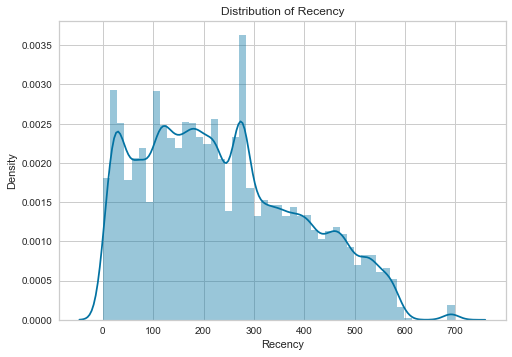

Recency's: Skew: 0.4474796177453325, : SkewtestResult(statistic=53.3499568412996, pvalue=0.0)


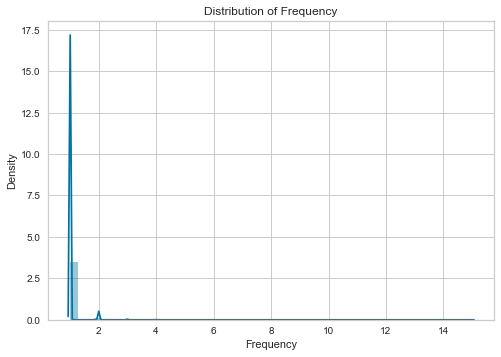

Frequency's: Skew: 11.09497802654547, : SkewtestResult(statistic=336.53452186685894, pvalue=0.0)


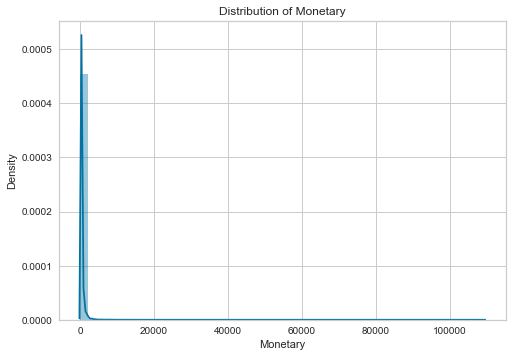

Monetary's: Skew: 69.29265676014231, : SkewtestResult(statistic=523.0086022063139, pvalue=0.0)


In [35]:
for col in rfm_df.columns[1:]:
    check_skew(rfm_df, col)

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

We'll log transform Frequency and Monetary as they are highly skwed.

In [36]:
# Perform log transformation 
rfm_df_log = rfm_df.copy()
for c in rfm_df.columns[2:]:
    rfm_df_log[c] = np.log10(rfm_df_log[c])

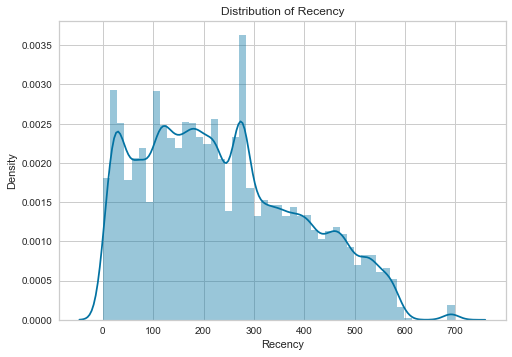

Recency's: Skew: 0.4474796177453325, : SkewtestResult(statistic=53.3499568412996, pvalue=0.0)


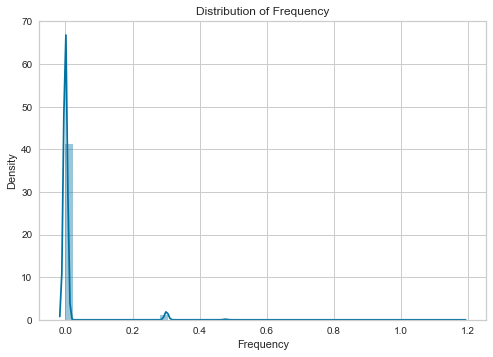

Frequency's: Skew: 6.091274528304434, : SkewtestResult(statistic=275.76729124377977, pvalue=0.0)


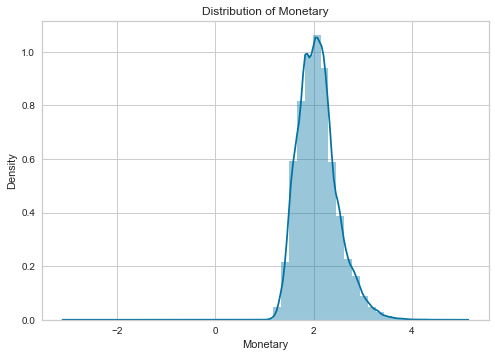

Monetary's: Skew: 0.7054883424635908, : SkewtestResult(statistic=79.64333914825788, pvalue=0.0)


In [37]:
for col in rfm_df.columns[1:]:
    check_skew(rfm_df_log, col)

In [38]:
scaler = MinMaxScaler()
scaler.fit(rfm_df_log.drop("customer_unique_id", axis=1))
RFM_Table_scaled = scaler.transform(rfm_df_log.drop("customer_unique_id", axis=1))
# Put data into a df
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=rfm_df_log.columns[1:])

In [39]:
RFM_Table_scaled.head()

Recency  Frequency  Monetary
0  0.155679        0.0  0.640900
1  0.159887        0.0  0.551635
2  0.753155        0.0  0.613983
3  0.450210        0.0  0.577171
4  0.403926        0.0  0.658594

In [40]:
RFM_Table_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    93358 non-null  float64
 1   Frequency  93358 non-null  float64
 2   Monetary   93358 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


In [41]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [42]:
numerical_features = list(rfm_df.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['Recency', 'Frequency', 'Monetary']

In [43]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

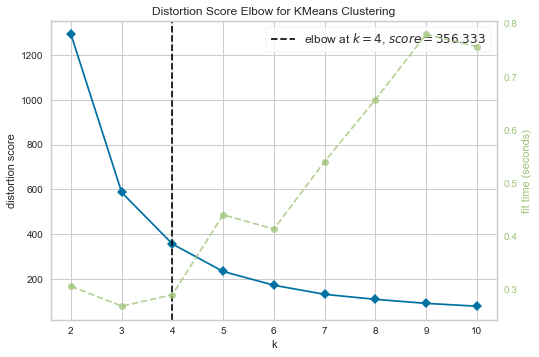

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
X = rfm_df.copy()

# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

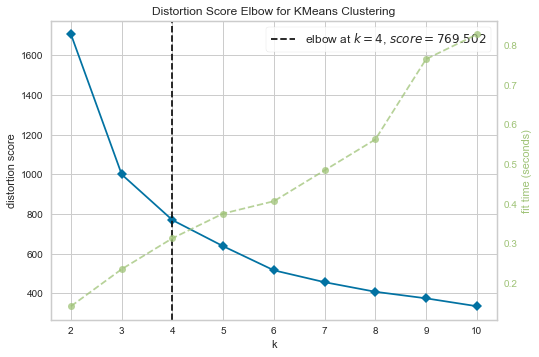

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
Xa = RFM_Table_scaled.copy()

# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(Xa)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

Grâce à la méthode du coude basée sur le score de distorsion (somme moyenne des carrés des distances aux centres), une segmentation en K = 4 clusters serait la meilleure option.

**Coefficient de silhouette**

Pour vérifier si ce clustering fonctionne, nous allons utiliser SilhouetteVisualizer pour afficher le coefficient de silhouette pour un échantillonage de chaque cluster. Cela permet de visualiser la densité et la séparation des clusters.

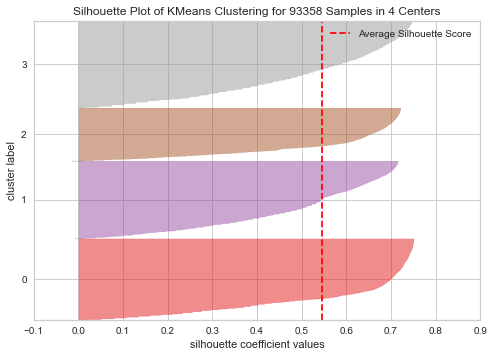

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93358 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

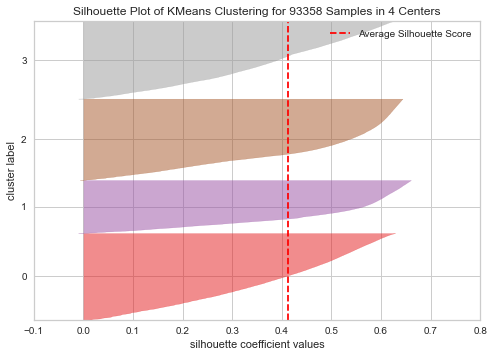

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93358 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(Xa)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

**Distances intercluster**

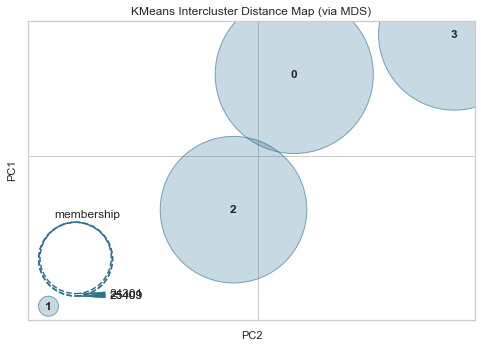

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [48]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

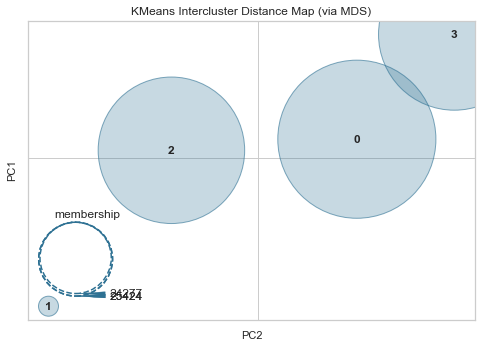

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [49]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(Xa)
distance_visualizer.named_steps['distancevisualizer'].show()

**Analyse des différents clusters**

In [50]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(X)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
rfm_df["kmeans_label"] = kmeans_labels

In [51]:
kmeans_clusters_means = rfm_df.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

kmeans_label     Recency  Frequency    Monetary
0             0   61.906923   1.038530  216.399903
1             1  483.372078   1.024890  201.603677
2             2  313.831365   1.031768  221.243553
3             3  183.424469   1.035320  209.258339

In [52]:
X_scaled = preprocessor.fit_transform(X)

In [53]:
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=numerical_features)

In [54]:
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

Recency  Frequency  Monetary
kmeans_label                               
0             0.086825   0.002752  0.001980
1             0.677941   0.001778  0.001844
2             0.440155   0.002269  0.002024
3             0.257256   0.002523  0.001914

In [55]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

In [56]:
plot_radars(data=X_scaled_clusters,
            group="kmeans_label")

In [57]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(Xa)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
RFM_Table_scaled["kmeans_label"] = kmeans_labels

In [58]:
kmeans_clusters_means = RFM_Table_scaled.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

kmeans_label   Recency  Frequency  Monetary
0             0  0.677752   0.006047  0.631036
1             1  0.086919   0.009263  0.633488
2             2  0.257344   0.008492  0.632220
3             3  0.440029   0.007960  0.633368

In [59]:
Xa_scaled = preprocessor.fit_transform(Xa)

In [60]:
Xa_scaled = pd.DataFrame(Xa_scaled, index=Xa.index, columns=numerical_features)

In [61]:
Xa_scaled["kmeans_label"] = kmeans_labels
Xa_scaled_clusters = Xa_scaled.groupby("kmeans_label").mean()
Xa_scaled_clusters

Recency  Frequency  Monetary
kmeans_label                               
0             0.677752   0.006047  0.631036
1             0.086919   0.009263  0.633488
2             0.257344   0.008492  0.632220
3             0.440029   0.007960  0.633368

In [62]:
plot_radars(data=Xa_scaled_clusters,
            group="kmeans_label")

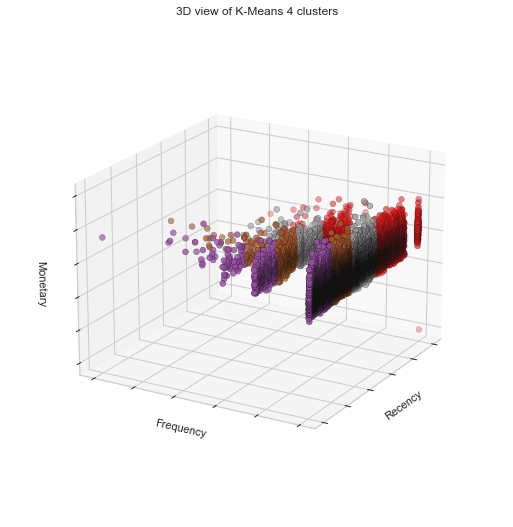

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(RFM_Table_scaled['Recency'],
           RFM_Table_scaled['Frequency'],
           RFM_Table_scaled['Monetary'],
           c=RFM_Table_scaled['kmeans_label'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D view of K-Means 4 clusters')
ax.dist = 12

plt.show()

# RFM élargie

In [64]:
# Merging dfs
rf_df1 = df_recency.merge(frequency_df, on='customer_unique_id')
rfm_df1 = rf_df1.merge(monetary_df, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm_df1 = pd.merge(rfm_df1, TimeToDelivery_df,
                       how="left",
                       on="customer_unique_id")
rfm_df1 = pd.merge(rfm_df1, DeliveryDelayinDays_df,
                       how="left",
                       on="customer_unique_id")
rfm_df1 = pd.merge(rfm_df1, average_review_score_df,
                       how="left",
                       on="customer_unique_id")
rfm_df1.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   TimeToDeliveryinDays  DeliveryDelayinDays  review_score  
0                  6.41                -4.13           5.0  
1                  3.29                -4.25           4.0  
2                 25.73                -1.39           3.0  
3                 20.04               -11.11           4.0  
4                 13.14                -7.04           5.0

In [65]:
rfm_df1.describe()

Recency     Frequency       Monetary  TimeToDeliveryinDays  \
count  93358.000000  93358.000000   93358.000000          93350.000000   
mean     237.478877      1.033420     212.964557             12.566160   
std      152.595054      0.209097     646.223866              9.547511   
min        0.000000      1.000000       0.000000              0.530000   
25%      114.000000      1.000000      63.830000              6.790000   
50%      218.000000      1.000000     113.140000             10.230000   
75%      346.000000      1.000000     202.637500             15.720000   
max      713.000000     15.000000  109312.640000            209.630000   

       DeliveryDelayinDays  review_score  
count         93350.000000  92755.000000  
mean            -11.152129      4.153363  
std              10.142681      1.280573  
min            -146.020000      1.000000  
25%             -16.230000      4.000000  
50%             -11.752500      5.000000  
75%              -6.390000      5.000000  
max             188.980000      5.000000

In [66]:
rfm_df1.dropna(axis=0, how='any', inplace=True)

In [67]:
rfm_df1.describe()

Recency     Frequency       Monetary  TimeToDeliveryinDays  \
count  92747.000000  92747.000000   92747.000000          92747.000000   
mean     237.322943      1.033543     212.161376             12.526060   
std      152.600211      0.209552     630.051644              9.461696   
min        0.000000      1.000000       0.000000              0.530000   
25%      114.000000      1.000000      63.790000              6.780000   
50%      218.000000      1.000000     113.050000             10.220000   
75%      346.000000      1.000000     202.090000             15.667500   
max      713.000000     15.000000  109312.640000            208.350000   

       DeliveryDelayinDays  review_score  
count         92747.000000  92747.000000  
mean            -11.188198      4.153333  
std              10.072433      1.280565  
min            -146.020000      1.000000  
25%             -16.230000      4.000000  
50%             -11.885000      5.000000  
75%              -6.410000      5.000000  
max             188.980000      5.000000

In [68]:
# Remove zeros from data before log trans
rfm_df1[rfm_df1.columns[1:]] = rfm_df1[rfm_df1.columns[1:]].applymap(lambda x: 0.001 if x ==0 else x)

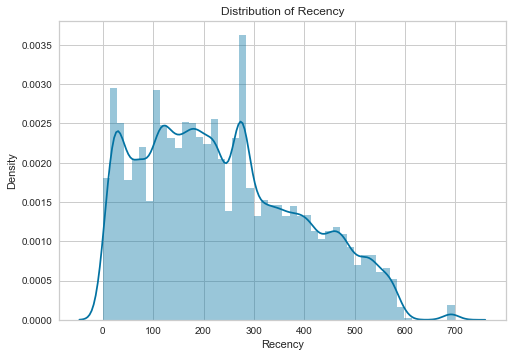

Recency's: Skew: 0.4481205324746875, : SkewtestResult(statistic=53.244996661842976, pvalue=0.0)


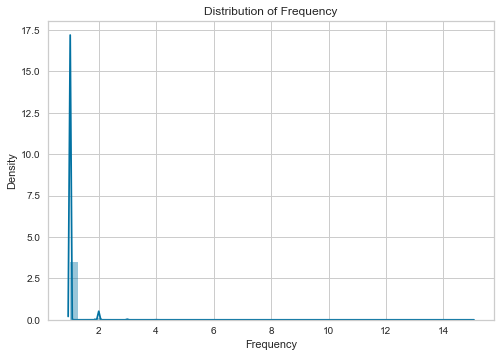

Frequency's: Skew: 11.08436476112722, : SkewtestResult(statistic=335.334907946463, pvalue=0.0)


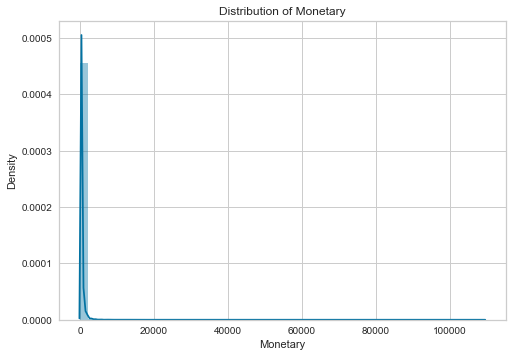

Monetary's: Skew: 71.3000659073534, : SkewtestResult(statistic=524.1944121434946, pvalue=0.0)


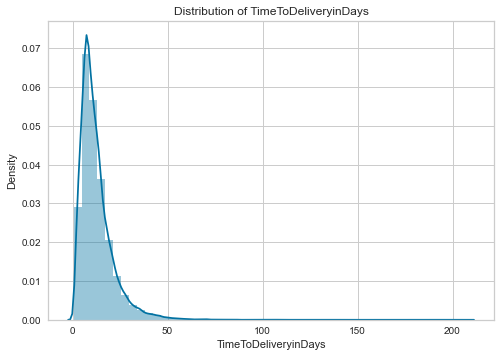

TimeToDeliveryinDays's: Skew: 3.8299703267535805, : SkewtestResult(statistic=228.43292958194138, pvalue=0.0)


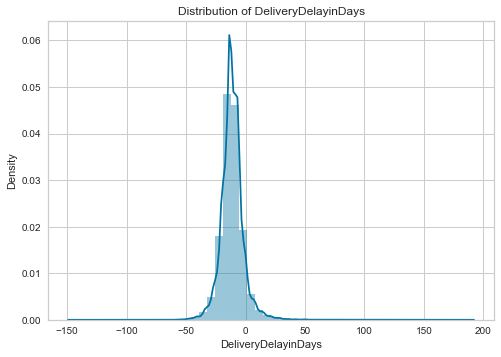

DeliveryDelayinDays's: Skew: 2.0273669892857287, : SkewtestResult(statistic=166.59779349308678, pvalue=0.0)


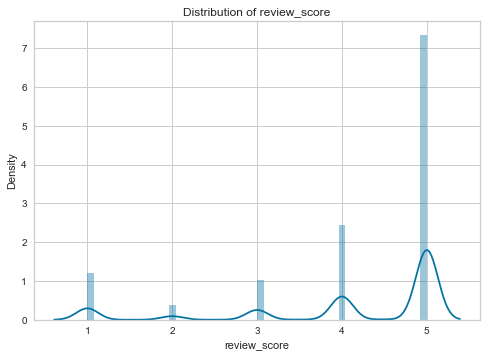

review_score's: Skew: -1.4773439379191757, : SkewtestResult(statistic=-137.56752851052724, pvalue=0.0)


In [69]:
for col in rfm_df1.columns[1:]:
    check_skew(rfm_df1, col)

In [70]:
numerical_features = list(rfm_df1.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['Recency',
 'Frequency',
 'Monetary',
 'TimeToDeliveryinDays',
 'DeliveryDelayinDays',
 'review_score']

In [71]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

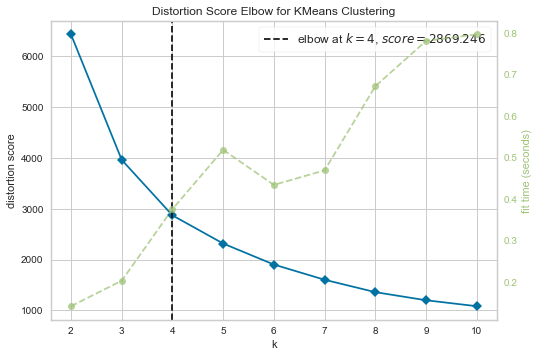

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
X1 = rfm_df1.copy()

# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(X1)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

Grâce à la méthode du coude basée sur le score de distorsion (somme moyenne des carrés des distances aux centres), une segmentation en K = 4 clusters serait la meilleure option.

**Coefficient de silhouette**

Pour vérifier si ce clustering fonctionne, nous allons utiliser SilhouetteVisualizer pour afficher le coefficient de silhouette pour un échantillonage de chaque cluster. Cela permet de visualiser la densité et la séparation des clusters.

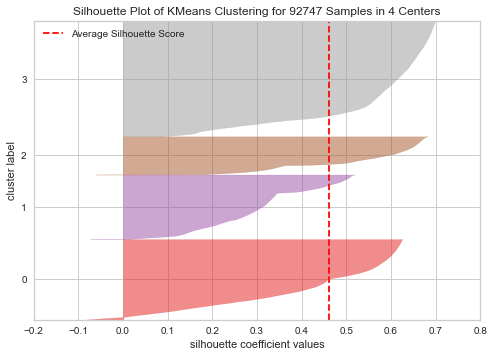

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92747 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [73]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X1)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

**Distances intercluster**

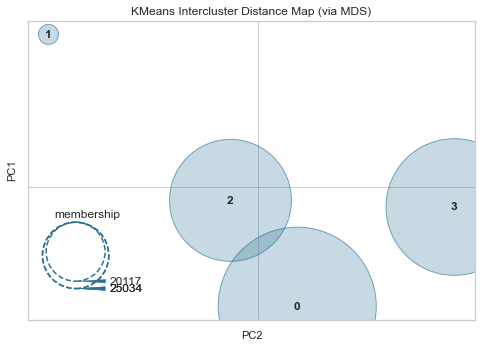

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [74]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X1)
distance_visualizer.named_steps['distancevisualizer'].show()

**Analyse des différents clusters**

In [75]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(X1)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
rfm_df1["kmeans_label"] = kmeans_labels

In [76]:
kmeans_clusters_means = rfm_df1.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

kmeans_label     Recency  Frequency    Monetary  TimeToDeliveryinDays  \
0             0  422.253611   1.028488  196.922713             11.422487   
1             1  179.984833   1.038538  206.830398             12.949617   
2             2  139.539417   1.037735  190.900498             10.501554   
3             3  236.743705   1.023154  317.668793             20.252318   

   DeliveryDelayinDays  review_score  
0           -13.379968      4.726531  
1           -10.596700      3.650992  
2           -12.230346      4.996822  
3            -4.397240      1.247183

In [77]:
X1_scaled = preprocessor.fit_transform(X1)

In [78]:
X1_scaled = pd.DataFrame(X1_scaled, index=X1.index, columns=numerical_features)

In [79]:
X1_scaled["kmeans_label"] = kmeans_labels
X1_scaled_clusters = X1_scaled.groupby("kmeans_label").mean()
X1_scaled_clusters

Recency  Frequency  Monetary  TimeToDeliveryinDays  \
kmeans_label                                                        
0             0.592220   0.002035  0.001801              0.052413   
1             0.252432   0.002753  0.001892              0.059761   
2             0.195706   0.002695  0.001746              0.047982   
3             0.332038   0.001654  0.002906              0.094901   

              DeliveryDelayinDays  review_score  
kmeans_label                                     
0                        0.395940      0.931633  
1                        0.404249      0.662748  
2                        0.399372      0.999205  
3                        0.422755      0.061796

In [80]:
X1_scaled_clusters.describe()

Recency  Frequency  Monetary  TimeToDeliveryinDays  \
count  4.000000   4.000000  4.000000              4.000000   
mean   0.343099   0.002284  0.002086              0.063764   
std    0.175242   0.000532  0.000550              0.021319   
min    0.195706   0.001654  0.001746              0.047982   
25%    0.238251   0.001940  0.001788              0.051305   
50%    0.292235   0.002365  0.001847              0.056087   
75%    0.397084   0.002710  0.002146              0.068546   
max    0.592220   0.002753  0.002906              0.094901   

       DeliveryDelayinDays  review_score  
count             4.000000      4.000000  
mean              0.405579      0.663846  
std               0.011947      0.426865  
min               0.395940      0.061796  
25%               0.398514      0.512510  
50%               0.401810      0.797190  
75%               0.408875      0.948526  
max               0.422755      0.999205

In [81]:
plot_radars(data=X1_scaled_clusters,
            group="kmeans_label")

**Cluster 0** :
Plusieurs commandes pour des montants moyens et plutôt récentes pour des délais légèrement plus élevés que la moyenne et des avis moyens

**Cluster 1** :
Commande peu fréquente relativement ancienne et de montant élevé mais avec des délais de livraison élevés et des avis négatifs => Problématique

**Cluster 3** : commande ancienne, peu fréquente pour un montant légèrement inférieur à la moyenne avec des avis positifs

**Cluster 2** : des commandes récentes pour des montants inférieurs à la moyenne avec des avis très positifs et des délais de livraison moyens

In [82]:
rfm_df1.to_csv("olist_customers_segmentation1.csv", index=False)

# DBSCAN

In [83]:
from sklearn.cluster import DBSCAN

In [84]:
from itertools import product

eps_values = np.arange(10,15,1) # eps values to be investigated
min_samples = np.arange(10,12,1) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [85]:
rfm_df.drop(['customer_unique_id'], axis=1, inplace=True)

In [86]:
rfm_df.describe()

Recency     Frequency       Monetary  kmeans_label
count  93358.000000  93358.000000   93358.000000  93358.000000
mean     237.478877      1.033420     212.964557      1.568585
std      152.595054      0.209097     646.223866      1.170512
min        0.001000      1.000000       0.001000      0.000000
25%      114.000000      1.000000      63.830000      0.000000
50%      218.000000      1.000000     113.140000      2.000000
75%      346.000000      1.000000     202.637500      3.000000
max      713.000000     15.000000  109312.640000      3.000000

In [87]:
rfm_df_select = rfm_df[rfm_df['Monetary'] < 2000]

In [88]:
rfm_df_select.describe()

Recency     Frequency      Monetary  kmeans_label
count  92664.000000  92664.000000  92664.000000  92664.000000
mean     237.494183      1.032602    182.691275      1.569326
std      152.552494      0.205220    225.274259      1.170453
min        0.001000      1.000000      0.001000      0.000000
25%      114.000000      1.000000     63.520000      0.000000
50%      219.000000      1.000000    112.300000      2.000000
75%      346.000000      1.000000    198.960000      3.000000
max      713.000000     15.000000   1996.320000      3.000000

In [89]:
from sklearn.metrics import silhouette_score
X =rfm_df_select.copy().sample(1000)

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

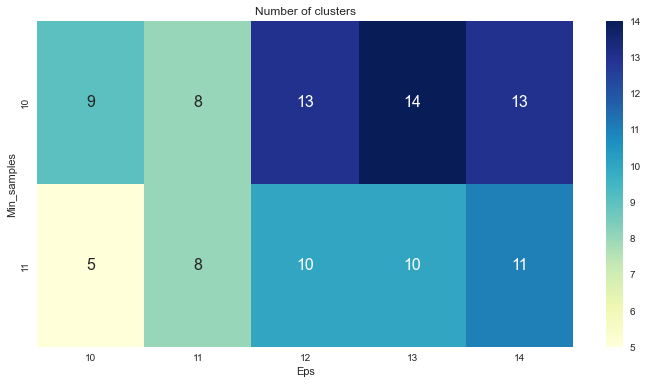

In [90]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

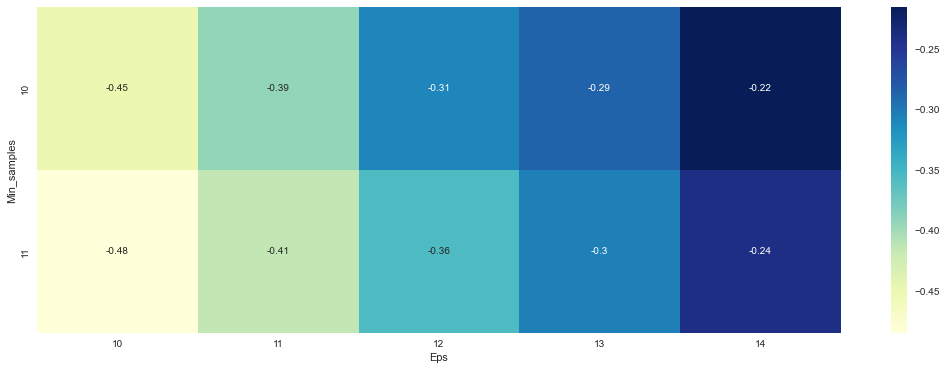

In [91]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [92]:
DBS_clustering = DBSCAN(eps=14, min_samples=10).fit(X)

DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [93]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1               661
 0                53
 1                18
 2                62
 3                16
 4                71
 5                20
 6                36
 7                11
 8                12
 9                15
 10               15
 11               10

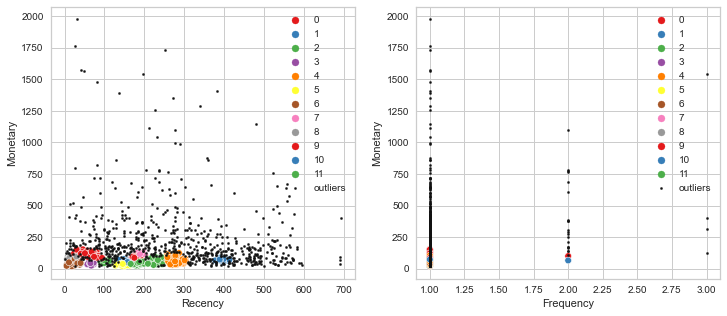

In [94]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Recency', 'Monetary',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Frequency', 'Monetary',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Recency'], outliers['Monetary'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Frequency'], outliers['Monetary'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

## DBSCAN + geo

In [95]:
rfm_df = pd.read_csv("olist-customers-segmentation.csv",
                   index_col=0)

In [96]:
rfm_df.head()

Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
0000f46a3911fa3c0805444483337064      537          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
0004aac84e0df4da2b147fca70cf8255      288          1    196.89

In [97]:
rfm_df.shape

(93358, 3)

In [98]:
# olist_customers_dataset
customers = pd.read_csv("olist_customers_dataset.csv")
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [99]:
rfm_df_geo = pd.merge(rfm_df, customers,
                    how="left",
                    on='customer_unique_id')

In [100]:
rfm_df_geo.drop(['customer_id', 'customer_city', 'customer_state'], axis=1, inplace=True)

In [101]:
rfm_df_geo = rfm_df_geo.rename(columns={"customer_zip_code_prefix": "geolocation_zip_code_prefix"})

In [102]:
rfm_df_geo.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   geolocation_zip_code_prefix  
0                         7787  
1                         6053  
2                        88115  
3                        66812  
4                        18040

In [103]:
test = rfm_df_geo[rfm_df_geo['geolocation_zip_code_prefix'] == 7787]

In [104]:
test

customer_unique_id  Recency  Frequency  Monetary  \
0      0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
7616   140349f48d58a4c5a30e66fe3da46797      259          1    159.82   
40215  6a527828dde2b20e0d5cda4e145deeee      232          1     21.17   
64856  ab78e3dc0a9ba374d7cd4aaf92254371      511          1     61.46   
72820  c06dae2996586cc98b92ea2c1187da8b      288          1     23.77   
90713  eff3fe4c7f245384022a2c4d7105e055      248          1    105.16   

       geolocation_zip_code_prefix  
0                             7787  
7616                          7787  
40215                         7787  
64856                         7787  
72820                         7787  
90713                         7787

In [105]:
rfm_df_geo.shape

(96683, 5)

In [106]:
# olist_geolocation_dataset
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [107]:
testgeo = geolocation[geolocation['geolocation_zip_code_prefix'] == 7787]

In [108]:
testgeo

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
191113                         7787       -23.335331       -46.828647   
191114                         7787       -23.337801       -46.919983   
191148                         7787       -23.343670       -46.824528   
191179                         7787       -23.336104       -46.829195   
191187                         7787       -23.338572       -46.826739   
...                             ...              ...              ...   
192530                         7787       -23.348433       -46.826243   
192532                         7787       -23.334254       -46.829391   
192548                         7787       -23.348433       -46.826243   
192563                         7787       -23.335784       -46.829117   
192607                         7787       -23.353375       -46.824556   

       geolocation_city geolocation_state  
191113          cajamar                SP  
191114          cajamar                SP  
191148          cajamar                SP  
191179          cajamar                SP  
191187          cajamar                SP  
...                 ...               ...  
192530          cajamar                SP  
192532          cajamar                SP  
192548          cajamar                SP  
192563          cajamar                SP  
192607          cajamar                SP  

[66 rows x 5 columns]

In [109]:
geolocation_agg = geolocation.groupby(by="geolocation_zip_code_prefix").agg(
                               {"geolocation_lat": 'mean',
                                "geolocation_lng": 'mean'})

In [110]:
geolocation_agg.head()

geolocation_lat  geolocation_lng
geolocation_zip_code_prefix                                  
1001                              -23.550190       -46.634024
1002                              -23.548146       -46.634979
1003                              -23.548994       -46.635731
1004                              -23.549799       -46.634757
1005                              -23.549456       -46.636733

In [111]:
rfm_df_geo_latlon = pd.merge(rfm_df_geo, geolocation_agg,
                    how="left",
                    on='geolocation_zip_code_prefix')

In [112]:
rfm_df_geo_latlon.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  
0                         7787       -23.340235       -46.830140  
1                         6053       -23.559115       -46.787626  
2                        88115       -27.542880       -48.633426  
3                        66812        -1.312214       -48.483159  
4                        18040       -23.505548       -47.469705

In [113]:
rfm_df_geo_latlon.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)

In [114]:
rfm_df_geo_latlon.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19   
2  0000f46a3911fa3c0805444483337064      537          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89   

   geolocation_lat  geolocation_lng  
0       -23.340235       -46.830140  
1       -23.559115       -46.787626  
2       -27.542880       -48.633426  
3        -1.312214       -48.483159  
4       -23.505548       -47.469705

In [115]:
rfm_df_geo_latlon.describe()

Recency     Frequency       Monetary  geolocation_lat  \
count  96683.000000  96683.000000   96683.000000     96419.000000   
mean     236.798796      1.076115     223.881303       -21.201989   
std      152.424943      0.379728     679.867141         5.600381   
min        0.000000      1.000000       0.000000       -33.689948   
25%      114.000000      1.000000      65.000000       -23.589847   
50%      218.000000      1.000000     116.130000       -22.924970   
75%      345.000000      1.000000     210.870000       -20.140216   
max      713.000000     15.000000  109312.640000        42.184003   

       geolocation_lng  
count     96419.000000  
mean        -46.188038  
std           4.054020  
min         -72.668881  
25%         -48.118182  
50%         -46.631931  
75%         -43.624737  
max          -8.723762

In [116]:
rfm_df_geo_latlon.dropna(axis=0, how='any', inplace=True)

In [117]:
rfm_df_geo_latlon.describe()

Recency     Frequency       Monetary  geolocation_lat  \
count  96419.000000  96419.000000   96419.000000     96419.000000   
mean     236.841867      1.076116     223.893422       -21.201989   
std      152.451635      0.379940     680.469326         5.600381   
min        0.000000      1.000000       0.000000       -33.689948   
25%      114.000000      1.000000      65.000000       -23.589847   
50%      218.000000      1.000000     116.160000       -22.924970   
75%      345.000000      1.000000     210.900000       -20.140216   
max      713.000000     15.000000  109312.640000        42.184003   

       geolocation_lng  
count     96419.000000  
mean        -46.188038  
std           4.054020  
min         -72.668881  
25%         -48.118182  
50%         -46.631931  
75%         -43.624737  
max          -8.723762

In [118]:
pdf = rfm_df_geo_latlon.sample(1000)

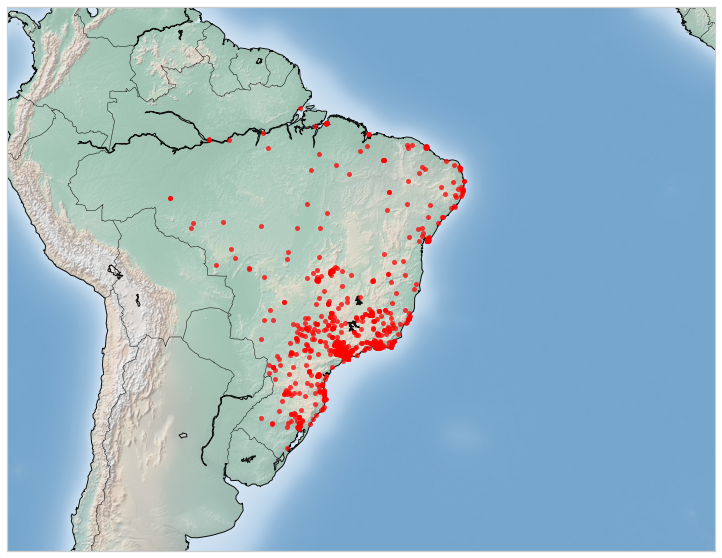

In [119]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-80
ulon=-10
llat=-40
ulat=10

pdf = pdf[(pdf['geolocation_lng'] > llon) & (pdf['geolocation_lng'] < ulon) & (pdf['geolocation_lat'] > llat) &(pdf['geolocation_lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.geolocation_lng), np.asarray(pdf.geolocation_lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

In [120]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import MinMaxScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Recency','Frequency','Monetary']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = MinMaxScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=14, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["customer_unique_id","Recency",'Frequency','Monetary',"Clus_Db"]].head(5)

customer_unique_id  Recency  Frequency  Monetary  Clus_Db
2581   06e1d389f74c352f6e4e4c0436e1ffcb      316          1     46.00        0
77721  cd8194555de80b28e7f87a3cec59b422      284          1     75.57        0
63704  a86044788fad77c81f1ca6f22933f749      178          1     95.09        0
18309  305c985de11e20cac5c0780ef4d6d1f6      118          1    161.45        0
34579  5b518776add29ced401d66c76d3f4b47      524          1    105.74        0

In [121]:
pdf["Clus_Db"].unique()

array([0], dtype=int64)

Cluster 0, Avg Monetary: 261.3196399999999


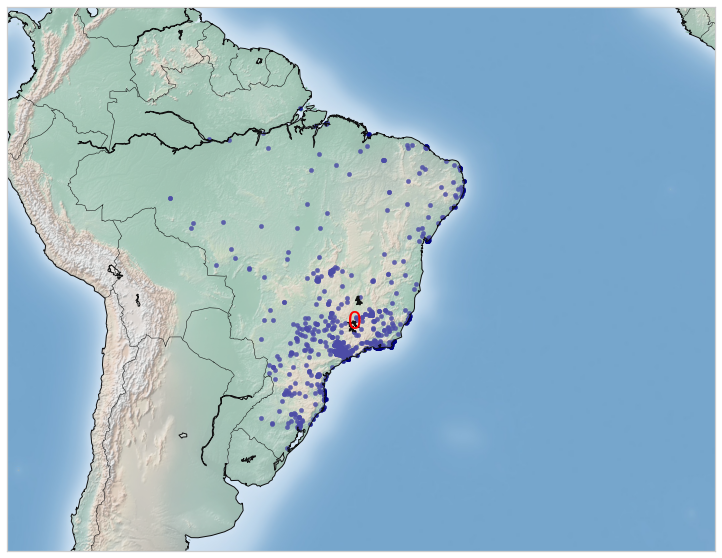

In [122]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Monetary: '+ str(np.mean(clust_set.Monetary)))

# Clustering hiérarchique

In [123]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [124]:
filename = 'olist-customers-segmentation.csv'

#Read csv
df = pd.read_csv(filename, index_col = 0)
print ("Shape of dataset: ", df.shape)

df.head(5)

Shape of dataset:  (93358, 3)


Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
0000f46a3911fa3c0805444483337064      537          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
0004aac84e0df4da2b147fca70cf8255      288          1    196.89

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    93358 non-null  int64  
 1   Frequency  93358 non-null  int64  
 2   Monetary   93358 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.8+ MB


In [126]:
df = df.sample(1000).reset_index()

**Feature selection**

Sélectionnons notre set de variables :

In [127]:
featureset = df[['Recency',  'Frequency', 'Monetary']]

**Normalisation**

Maintenant nous pouvons normaliser notre set de variables. MinMaxScaler transforme les variables en mettant à l'échelle chaque variable dans un intervalle défini. Par défaut (0, 1).

In [128]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.22141823, 0.        , 0.13252218],
       [0.23878437, 0.        , 0.04561896],
       [0.27930535, 0.        , 0.08954058],
       [0.38494935, 0.        , 0.0134013 ],
       [0.23589001, 0.33333333, 0.05832914]])

**Clustering avec scikit-learn** (scipy également testé dans un autre notebook)

In [129]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx)

In [130]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

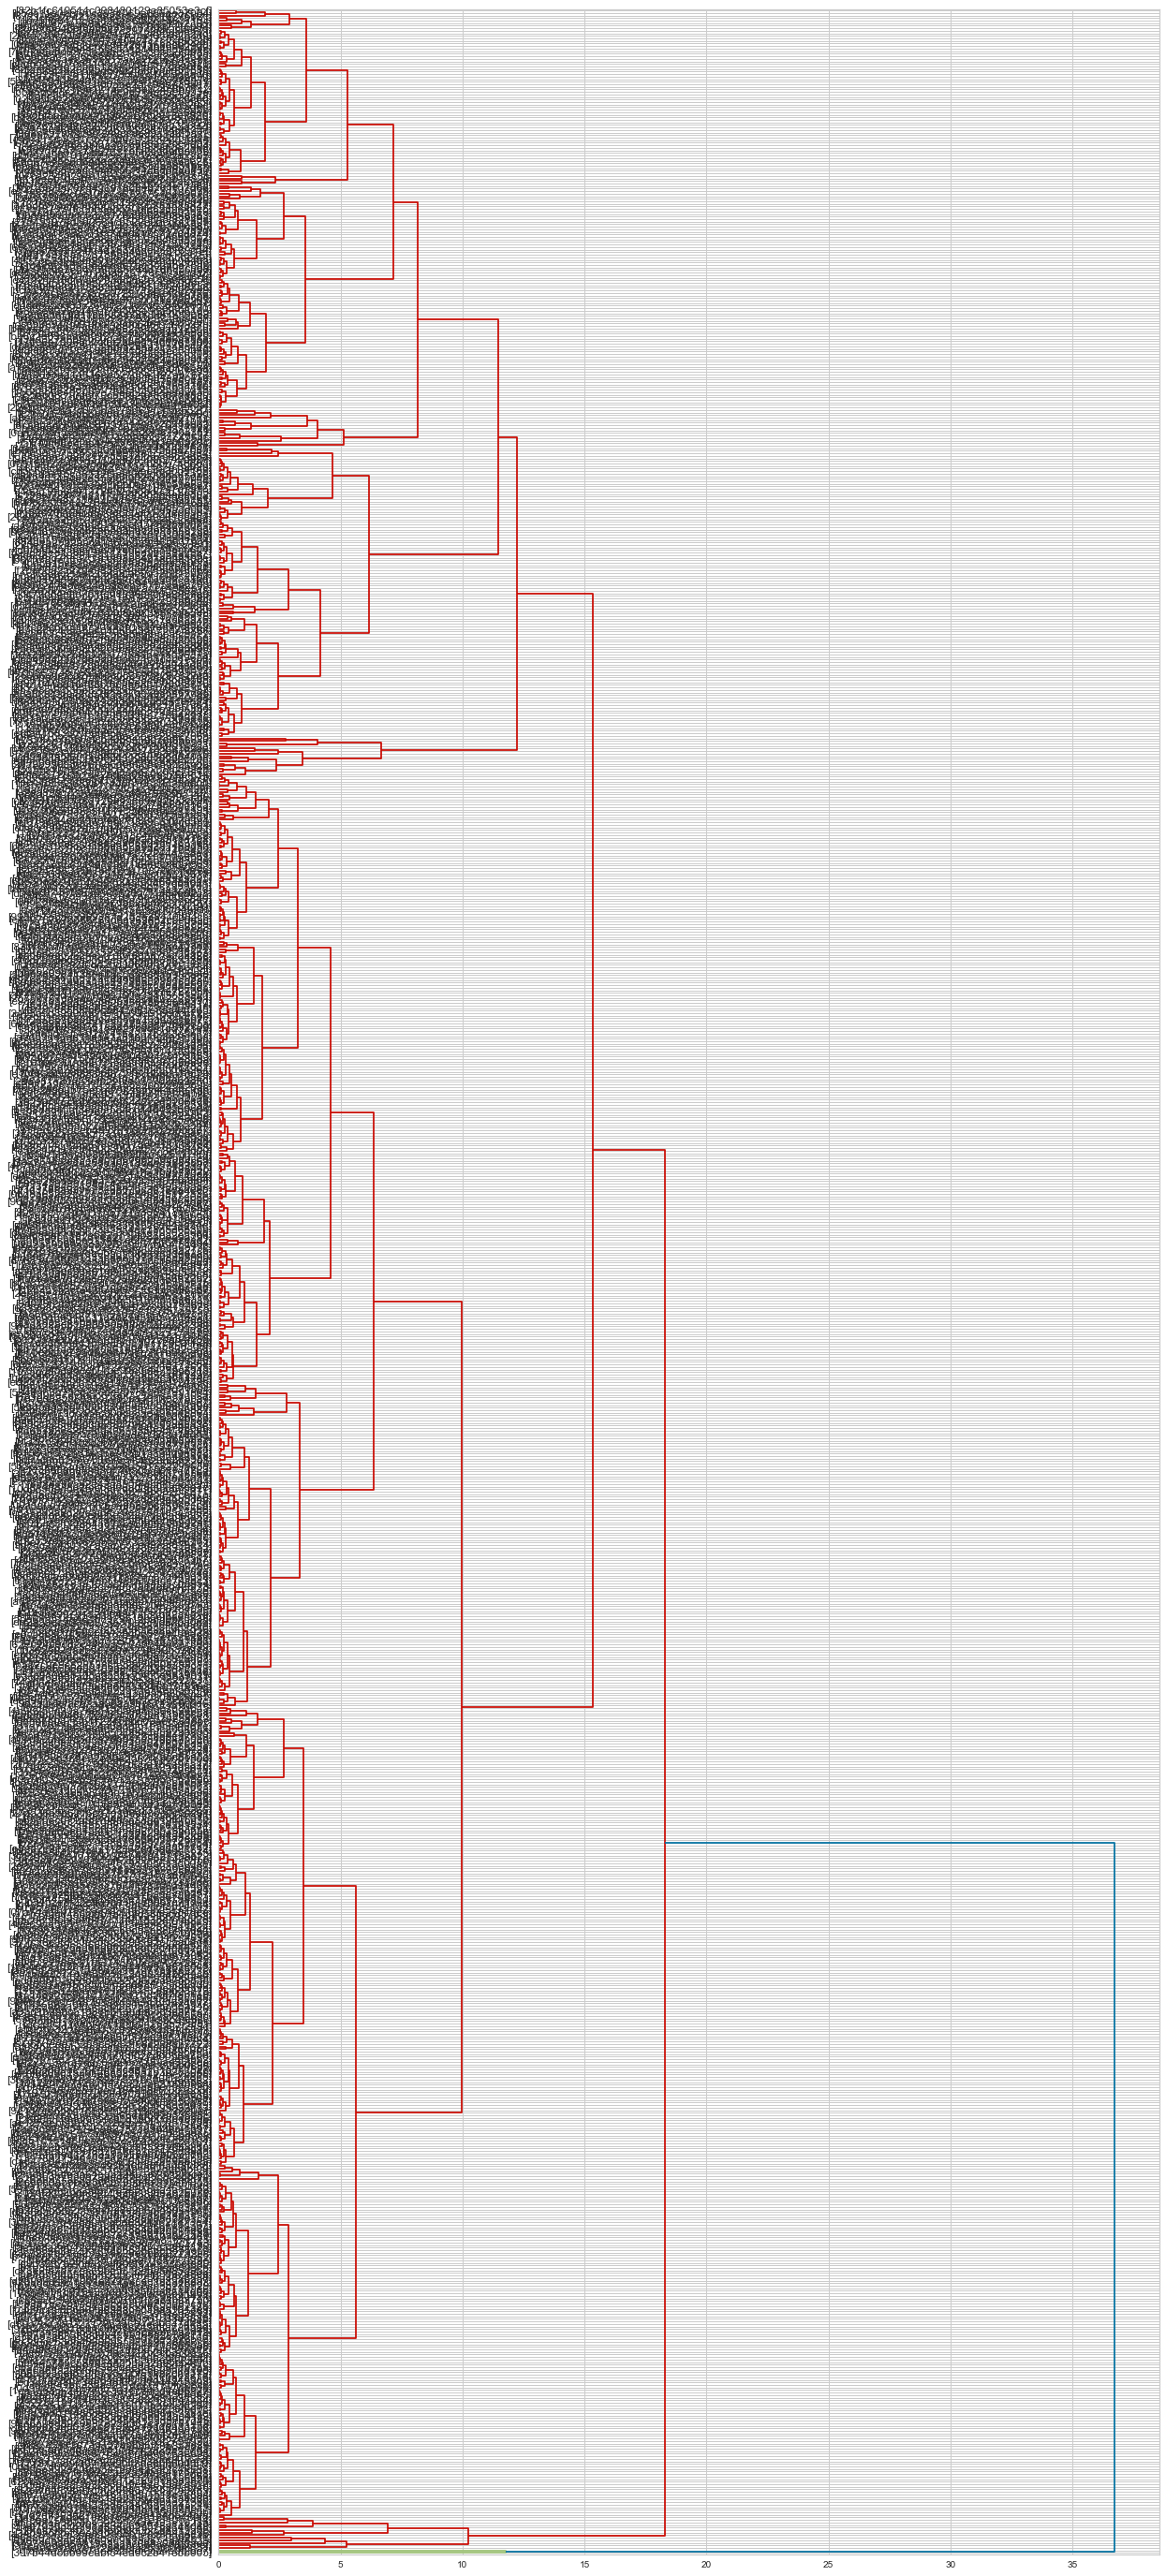

In [131]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s]' % (df['customer_unique_id'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach. Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters. Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [132]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 2, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0,
       3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 2, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3,

Nous pouvons ajouter une nouvelle variable à notre dataframe pour identifier le cluster correspondant sur chaque ligne :

In [133]:
df['cluster_'] = agglom.labels_
df.head()

customer_unique_id  Recency  Frequency  Monetary  cluster_
0  92ea89cc73adda82fbaf897a48947927      155          1    516.48         3
1  d9b27380a404b2f7f88faa075302f1b1      167          1    188.29         3
2  ad076f69fe41e2f2e356025bf2751920      195          1    354.16         3
3  4a88a750280bdba0dd1f167ae2b68bfd      268          1     66.62         3
4  e4f218d824a59b96c4399ad182327138      165          2    236.29         0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Frequency')

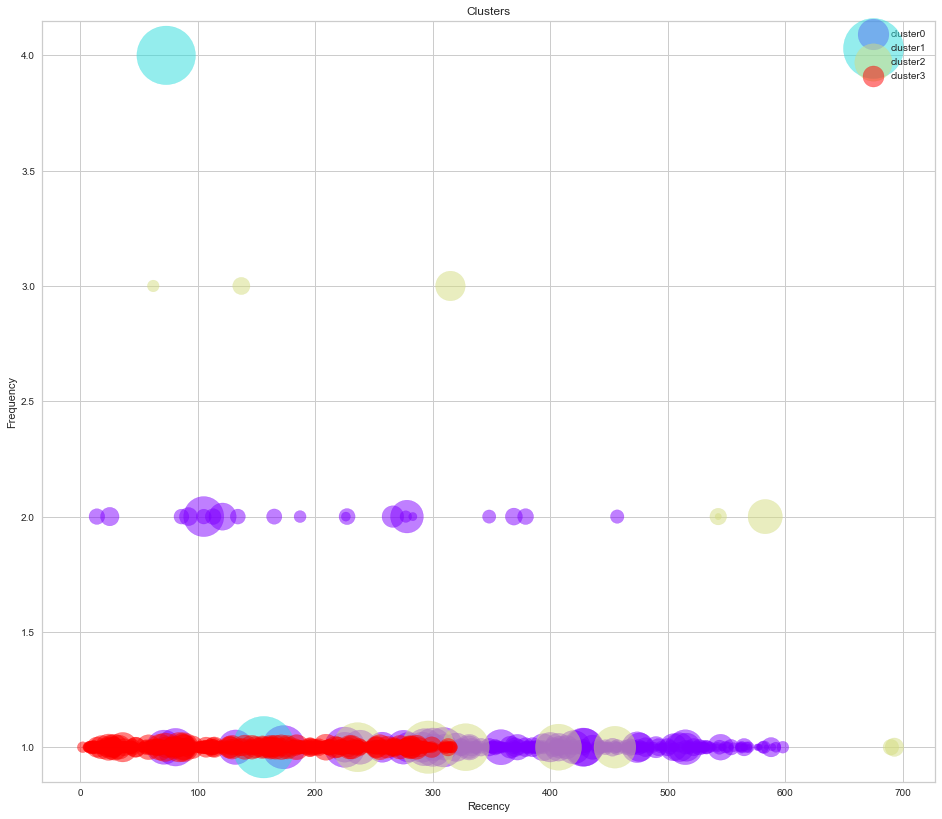

In [134]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Recency[i], subset.Frequency[i], str(''), rotation=25)
    plt.scatter(subset.Recency, subset.Frequency, s= subset.Monetary, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.Recency, subset.Frequency)
plt.legend()
plt.title('Clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')

In [135]:
agg_customers = df.groupby(['cluster_'])['Recency','Frequency','Monetary'].mean()
agg_customers

Recency  Frequency     Monetary
cluster_                                    
0         410.531561   1.069767   245.907110
1         114.500000   2.500000  3614.290000
2         406.769231   1.692308  1129.246923
3         156.995614   1.000000   155.092588

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Frequency')

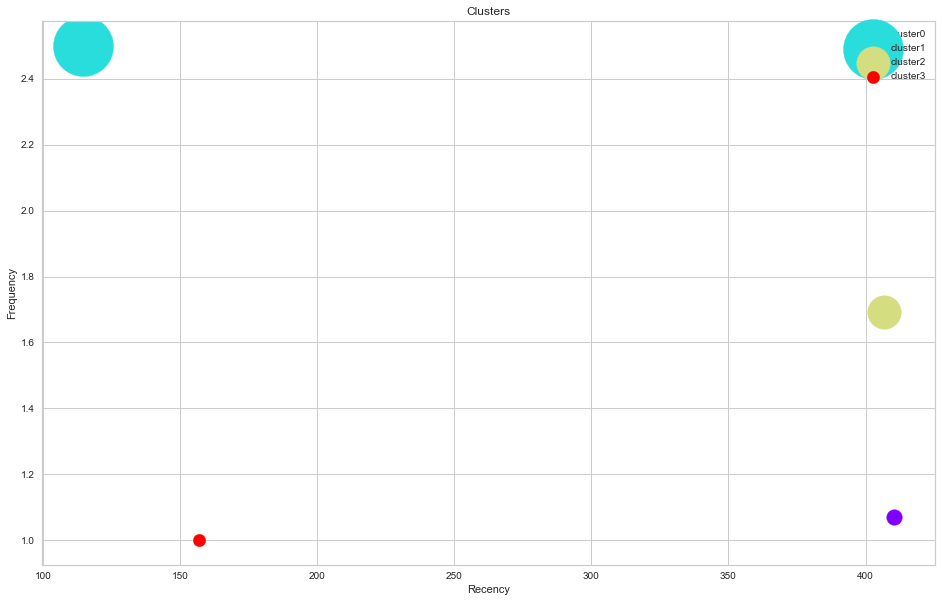

In [136]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_customers.loc[(label,),]
    for i in subset.index:
        plt.scatter(subset.Recency, subset.Frequency, s=subset.Monetary, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')